<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Statistical Learning with Python</h1>
<h2 align="center" style="margin-top:20px">Lecture 1: Introduction to Statistical Learning</h2>
<br>

In this lesson we use a simple dataset to illustrate some basic steps of a supervised learning project: loading and processing the dataset, creating training and test sets, learning a simple model, making predictions, and evaluating predictive performance. We will also illustrate other important practical aspects of modelling, such as exploratory data analysis (EDA).


<a href="#1.-Credit-Card-Data">Credit Card Data</a> <br>
<a href="#2.-Training-and-Test-Sets">Training and Test Sets</a> <br>
<a href="#3.-Exploratory-Data-Analysis">Exploratory Data Analysis</a> <br>
<a href="#4.-Feature-Engineering">Feature Engineering</a> <br>
<a href="#5.-Linear-Regression">Linear Regression</a> <br>
<a href="#6.-Model-Evaluation">Model Evaluation</a> <br>
<a href="#7.-Saving-the-Data">Saving the Data</a> <br>


This notebook relies on the following imports and settings. We will load new functions and libraries in context to make clear what we are using them for. 

In [1]:
from IPython.core.display import HTML
style = open('jstyle.css', "r").read()
HTML('<style>'+ style +'</style>')

In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
# this is to clear the warnings from this page, usually we should leave this on

In [3]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

### 1. Credit Card Data

In this lesson we will use the `Credit` dataset taken from the  <a href="http://www-bcf.usc.edu/~gareth/ISL/index.html" target="_blank">Introduction to Statistical Learning</a> texbook by James, Witten, Hastie and Tibshirani. The dataset records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating.

The business objective to predict the average monthly credit card balance of customers based on the available information about them.  

We start by loading the data. First, we need to load the pandas package. Since the dataset is in the <TT>csv</TT> format, we use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html" target="_blank"><TT>read_csv</TT></a> function to import the file. The package will automatically read the column names and infer the variable types.  We assign the data variable to a variable called <TT>data</TT>, which will store the dataset as an object called a <TT>DataFrame</TT>.

In [4]:
# We will always assume that the data file is in a subdirectory called "Data"

import pandas as pd

data=pd.read_csv('Data/Credit.csv', index_col='Obs')
data.head(10) # displays the first 10 rows of the dataset

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
Obs                                                                          
1     14.891   3606     283      2   34         11    Male      No     Yes   
2    106.025   6645     483      3   82         15  Female     Yes     Yes   
3    104.593   7075     514      4   71         11    Male      No      No   
4    148.924   9504     681      3   36         11  Female      No      No   
5     55.882   4897     357      2   68         16    Male      No     Yes   
6     80.180   8047     569      4   77         10    Male      No      No   
7     20.996   3388     259      2   37         12  Female      No      No   
8     71.408   7114     512      2   87          9    Male      No      No   
9     15.125   3300     266      5   66         13  Female      No      No   
10    71.061   6819     491      3   41         19  Female     Yes     Yes   

            Ethnicity  Balance  
Obs                             
1           Caucasian      333  
2               Asian      903  
3               Asian      580  
4               Asian      964  
5           Caucasian      331  
6           Caucasian     1151  
7    African American      203  
8               Asian      872  
9           Caucasian      279  
10   African American     1350

### 2. Training and Test Sets

We use the Scikit-Learn <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split</a> method to split the data into training and test sets. 

Below, we specify that the training set will contain 70% of the data. The random state parameter is an arbitrary number. By  setting the random state we ensure that get the same training and test sets if we run the analysis again, even though the split is random. 

In [5]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, random_state=10)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()

### 3. Exploratory Data Analysis

Exploratory data analysis (EDA) is the initial process of examining the data and discovering patterns that can inform feature engineering and model building. EDA is also fundamental for identifying data problems that need to be fixed, if any. Here, we conduct a short EDA of the dataset. 

**We use only the training dataset for exploratory data analysis.**

We start by computing the descriptive statistics and pairwise correlations for the numerical variables. When displaying the results, we chain a command to round the results to two decimal places to facilitate visual inspection.

The count row in the first table shows the number available observations for each variable. In this case all variables have the same count, reassuring us that there are no missing values. The response has a large standard deviation relative to the mean : we should keep these magnitudes in mind when discussing coefficient sizes and prediction errors.  The first quartile of the response is 64, indicating that a substantial fraction of customers have low balance. 

In [6]:
print(len(train)) #  number of observations in the training data frame
train.describe().round(1) # rounding the table to one decimal digit

280


Income    Limit  Rating  Cards    Age  Education  Balance
count   280.0    280.0   280.0  280.0  280.0      280.0    280.0
mean     44.6   4731.4   354.5    2.9   55.3       13.4    521.1
std      34.8   2343.7   156.6    1.3   17.3        3.2    458.2
min      10.4    855.0    93.0    1.0   23.0        5.0      0.0
25%      19.7   3082.5   247.2    2.0   41.0       11.0     64.0
50%      33.0   4636.0   344.0    3.0   54.0       14.0    459.5
75%      57.5   6034.8   443.5    4.0   69.0       16.0    864.2
max     186.6  13913.0   982.0    9.0   98.0       20.0   1999.0

The pairwise correlations reveal that the predictors that are most correlated with the response are limit, rating, and income. The remaining predictors have very low correlation with th credit card balance. Another important finding is that limit and rating have nearly perfect positive correlation. Therefore, we should work with only one of these variables to avoid multicollinearity problems. Also note that income is highly correlated with limit and rating. Limit seems to be the key linear predictor in data. 

In [7]:
train.corr().round(2)

Income  Limit  Rating  Cards   Age  Education  Balance
Income       1.00   0.80    0.80  -0.01  0.17       0.02     0.49
Limit        0.80   1.00    1.00  -0.01  0.10       0.00     0.87
Rating       0.80   1.00    1.00   0.03  0.10      -0.01     0.88
Cards       -0.01  -0.01    0.03   1.00  0.11      -0.11     0.04
Age          0.17   0.10    0.10   0.11  1.00      -0.05     0.02
Education    0.02   0.00   -0.01  -0.11 -0.05       1.00     0.01
Balance      0.49   0.87    0.88   0.04  0.02       0.01     1.00

We now investigate the (unconditional) distribution of the response by plotting a histogram. We find that the response has a pronouncedly right skewed distribution. A substantial number of customers has zero or low credit card balance. 

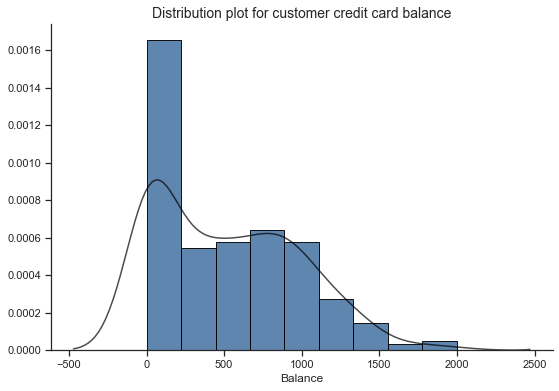

In [8]:
from statlearning import plot_dist

# The statlearning.py has file auxiliary Python functionality for this course  
# You have download and place it in the same directory as you are running this notebook from

fig, ax = plot_dist(train['Balance'])
ax.set_title('Distribution plot for customer credit card balance', fontsize=14)
plt.show()

In [9]:
(train['Balance']==0).sum()/len(train)

0.225

We should also plot the distribution of the predictors.

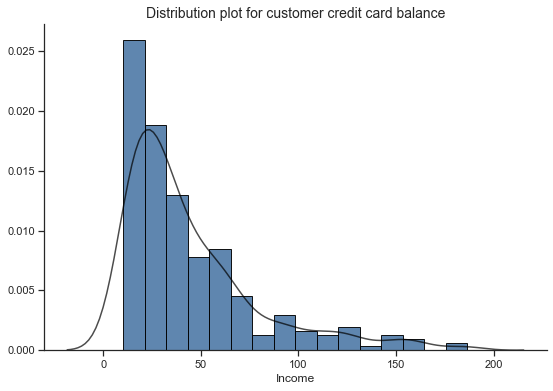

In [10]:
fig, ax = plot_dist(train['Income'])
ax.set_title('Distribution plot for customer credit card balance', fontsize=14)
plt.show()

A scatter plot of credit limit with credit balance reveals that there is a nonlinear relationship between these two variables. Furthermore, there are several customers with a response value of zero, which is likely to affect model fit.

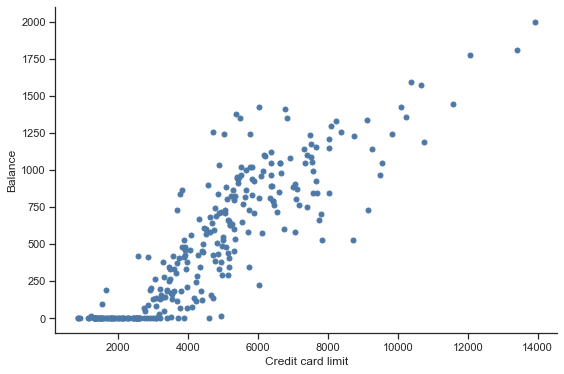

In [11]:
fig, ax = plt.subplots()
plt.scatter(train['Limit'], train['Balance'], s=25) # the s option is the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
sns.despine()
plt.show()

The next cell illustrates how we can create a figure to explore the relationship between a nominal variable and the response. 

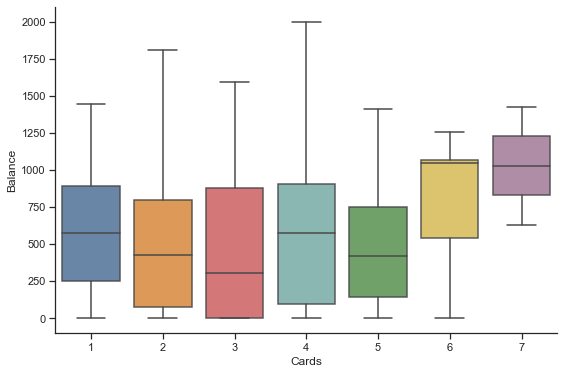

In [12]:
rows = train['Cards']<=7 # too few observations for more than 7 cards
sns.boxplot(x=train.loc[rows,'Cards'], y=train.loc[rows,'Balance'], boxprops=dict(alpha=.9))
sns.despine()
plt.show()

### 4. Feature Engineering

In machine learning and data science, feature engineering is the process of preparing the dataset for the learning algorithm. It may sound a bit too fancy for what we'll do in this lesson, but this is usually a critical step for predictive modelling, as we will discuss in more detail later.   

It is good practice to write a function that performs the full feature engineering process. There are a few reasons for this: 

<ol>
<li style="margin-top: 12px;">You need to process the test data in the same way. </li>
    
<li style="margin-top: 12px;">It allows you to easily reproduce the analysis. </li>

<li style="margin-top: 12px;">It helps you to build a library of data processing steps, which can save you a lot of time in the future.  </li>

<li style="margin-top: 12px;">You can use the function to continuously process new data in a live system. </li>

<li style="margin-top: 12px;">It makes it simple for you to try different feature engineering pipelines. </li>
</ol>

We do as follows for our dataset. 

In [13]:
def prepare_data(df):
    df['Male']=(df['Gender'] ==' Male').astype(int) # create dummy variable for gender
    df['Student']=(df['Student'] =='Yes').astype(int)
    df['Married']=(df['Married'] =='Yes').astype(int)
    df['Caucasian']=(df['Ethnicity'] =='Caucasian').astype(int)
    df['Asian']=(df['Ethnicity'] =='Asian').astype(int)
    df=df.loc[:, df.dtypes!='object'] # discards the columns that are not numerical
    df=df.drop(columns='Rating') # because of collinearity with limit
    return df

train = prepare_data(train)
test = prepare_data(test)

train.head()

Income  Limit  Cards  Age  Education  Student  Married  Balance  Male  \
Obs                                                                          
400  18.701   5524      5   64          7        0        0      966     0   
26   14.090   4323      5   25         16        0        1      671     0   
280  54.319   3063      3   59          8        1        0      269     0   
261  67.937   5184      4   63         12        0        1      345     1   
131  23.793   3821      4   56         12        1        1      868     0   

     Caucasian  Asian  
Obs                    
400          0      1  
26           0      0  
280          1      0  
261          0      1  
131          0      0

Finally, we need to identify and separate the response and the predictors. Initially we will use only one predictor, the credit card limit, for illustrative purposes. 

In [14]:
# Response label
response = 'Balance'

# Creates a list with the names of all variables which are not the respose
predictors = [variable for variable in train.columns if variable!=response] 

# Here we convert the data to NumPy arrays. This is not strictly necessary, but generally better.
y_train = train[response].to_numpy() 
X_train = train[predictors].to_numpy() 

y_test = train[response].to_numpy()
X_test = train[predictors].to_numpy() 

In [15]:
predictors

['Income',
 'Limit',
 'Cards',
 'Age',
 'Education',
 'Student',
 'Married',
 'Male',
 'Caucasian',
 'Asian']

### 5. Linear Regression

Scikit-Learn allows us to learn and use a wide range of machine learning algorithms using a simple and consistent recipe: 

1. Import the learning algorithm.<br>
2. Specify the model and options.<br>
3. Learn the model.<br>
4. Use the estimated model to make predictions. 

Here, we use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">LinearRegression</a> class from Scikit-Learn.

We start by training a model with only one predictor, the credit card limit (the second column in the design matrix `X_train`).

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train[: , 1].reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Some explanation is needed here. When we select one column through `X_train[: ,1]`, NumPy returns a flat array (that is, a 1D array). However, Scikit-Learn expects the argument to be a matrix (a 2D array). Therefore, we use `.reshape(-1, 1)` to reconfigure the array such that it becomes a matrix with one column (the `-1` part means that the number is rows is whatever it needs to be for the total number of elements to be same as in the original array).

Suppose that we want to predict the credit card balance of a customer that has a limit of 5000 dollars.

In [17]:
slr.predict(np.array([[5000]])) # again, the function only accepts a 2D array

array([566.97270565])

Let's visualise the estimated model. 

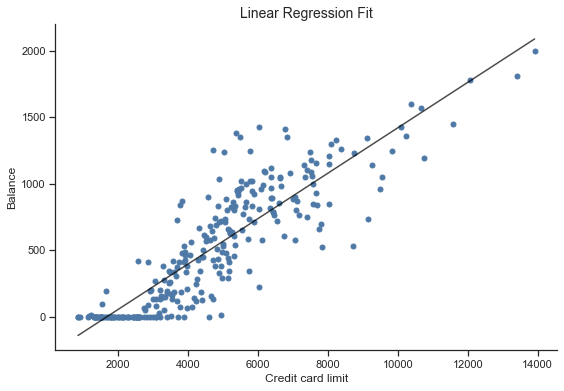

In [18]:
# Here, we generate a grid of 500 values ranging from the minimum to the maximum value of the
# variable in the training data
x = np.linspace(X_train[: , 1].min(), X_train[: , 1].max(), 2).reshape((-1,1))

# Compute the predicted values for each of these input points
y_pred = slr.predict(x)

# Figure
fig, ax = plt.subplots()
ax.scatter(X_train[: , 1], y_train, s=25) # the s option is the size of the dot
ax.set_title("Linear Regression Fit", fontsize=14)
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
ax.plot(x, y_pred, color='black', alpha = 0.7)
sns.despine()
plt.show()

Finally, let's fit a model with all the available predictors. 

In [19]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 6. Model evaluation

The final step in our analysis is model evaluation. Let's compare the two models from the previous section.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear regression (one predictor)', 'Linear regression (all predictors)']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# Computer test predictions and metrics
y_pred = slr.predict(X_test[:,1].reshape((-1,1))) 
results.iloc[0, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
results.iloc[0, 1] = r2_score(y_test, y_pred)
results.iloc[0, 2] = mean_absolute_error(y_test, y_pred) 

y_pred =  mlr.predict(X_test)
results.iloc[1, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
results.iloc[1, 1] = r2_score(y_test, y_pred)
results.iloc[1, 2] = mean_absolute_error(y_test, y_pred) 

results.round(2)

RMSE  R-Squared     MAE
Linear regression (one predictor)   223.02       0.76  168.91
Linear regression (all predictors)   99.11       0.95   79.02

### 7. Saving the Data

We'll continue working with this dataset in the next session. A good option here is to store the training and test dataframes in a [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. The Hierarchical Data Format (HDF) is very useful for data science because it provides a solution for managing large and heterogeneous datasets, unlike text formats such as csv.  

In [21]:
train.to_hdf('Data/Credit.h5', 'train')
test.to_hdf('Data/Credit.h5', 'test')

It is also possible to save the model. Refer to the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_persistence.html) if you wish to learn how to do that.